# python机器学习经典案例

## 第1章  监督学习

###  1.2 数据预处理

In [1]:
import numpy as np
from sklearn import preprocessing

In [2]:
data = np.array([[ 3, -1.5,  2, -5.4],
                 [ 0,  4,  -0.3, 2.1],
                 [ 1,  3.3, -1.9, -4.3]])

In [4]:
data_standardized = preprocessing.scale(data) #均值为0，标准差为1
print "\nMean =", data_standardized.mean(axis=0)
print "Std deviation =", data_standardized.std(axis=0)


Mean = [ 5.55111512e-17 -1.11022302e-16 -7.40148683e-17 -7.40148683e-17]
Std deviation = [1. 1. 1. 1.]


In [6]:
data_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)) #把这个函数命名为data_scaler
data_scaled = data_scaler.fit_transform(data)            #处理data数据
print "\nMin max scaled data:\n", data_scaled



Min max scaled data:
[[1.         0.         1.         0.        ]
 [0.         1.         0.41025641 1.        ]
 [0.33333333 0.87272727 0.         0.14666667]]


In [11]:
data_normalized = preprocessing.normalize(data, norm='l1')
print "\nL1 normalized data:\n",data_normalized


L1 normalized data:
[[ 0.25210084 -0.12605042  0.16806723 -0.45378151]
 [ 0.          0.625      -0.046875    0.328125  ]
 [ 0.0952381   0.31428571 -0.18095238 -0.40952381]]


In [15]:
# binarization
data_binarized = preprocessing.Binarizer(threshold=1.4).transform(data)
print "\nBinarized data:\n", data_binarized


Binarized data:
[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]]


In [16]:
# one hot encoding
encoder = preprocessing.OneHotEncoder()
encoder.fit([[0, 2, 1, 12], [1, 3, 5, 3], [2, 3, 2, 12], [1, 2, 4, 3]])
encoded_vector = encoder.transform([[2, 3, 5, 3]]).toarray()
print "\nEncoded vector:\n", encoded_vector



Encoded vector:
[[0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]]


### 1.3 标记编码方法

In [17]:
import numpy as np
from sklearn import preprocessing

In [22]:
label_encoder = preprocessing.LabelEncoder()
input_classes = ['audi','ford','audi','toyota','ford','bnw']
label_encoder.fit(input_classes)
print '\nClass mapping:'
for i,item in enumerate(label_encoder.classes_):
    print item ,'-->', i


Class mapping:
audi --> 0
bnw --> 1
ford --> 2
toyota --> 3


In [24]:
labels = ['toyota','ford','audi']
encoded_labels = label_encoder.transform(labels) 
print '\nLabels =',labels
print 'Encoded labels =', list(encoded_labels)


Labels = ['toyota', 'ford', 'audi']
Encoded labels = [3, 2, 0]


In [28]:
encoded_labels = [2,1,0,3,1]
decoded_labels = label_encoder.inverse_transform(encoded_labels)
print '\nEncoded labels =', encoded_labels
print 'Decoded labels =', list(decoded_labels)


Encoded labels = [2, 1, 0, 3, 1]
Decoded labels = ['ford', 'bnw', 'audi', 'toyota', 'bnw']


C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### 1.4 创建线性回归器

In [1]:
import sys
import numpy as np

filename = 'C:\\Users\\Administrator\\Desktop\\ing\\Python-Machine-Learning-Cookbook-master\\Chapter01\\data_singlevar.txt'
X = []
y = []
with open(filename, 'r') as f:
    for line in f.readlines():
        data = [float(i) for i in line.split(',')]
        xt, yt = data[:-1], data[-1]
        X.append(xt)
        y.append(yt)


In [6]:
# Train/test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# Training data
X_train = np.array(X[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])

# Test data
X_test = np.array(X[num_training:]).reshape((num_test,1))
y_test = np.array(y[num_training:])

In [7]:
from sklearn import linear_model
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

%matplotlib inline

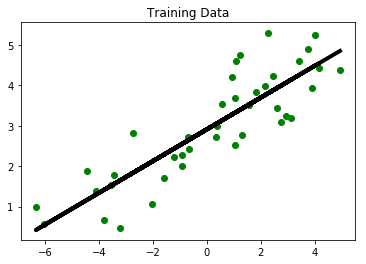

In [11]:
import matplotlib.pyplot as plt
y_train_pred = linear_regressor.predict(X_train)
plt.figure()
plt.scatter(X_train,y_train, color = 'green')
plt.plot(X_train,y_train_pred,color = 'black',linewidth = 4)
plt.title('Training Data')
plt.show()

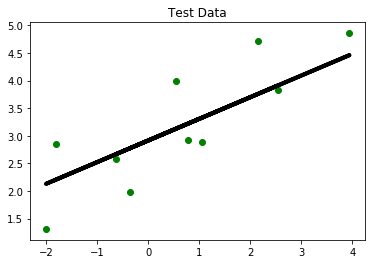

In [13]:
y_test_pred = linear_regressor.predict(X_test)
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.title('Test Data')
plt.show()

In [14]:
import sklearn.metrics as sm

print "Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2) 
print "Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2) 
print "Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2) 
print "Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2) 
print "R2 score =", round(sm.r2_score(y_test, y_test_pred), 2)

Mean absolute error = 0.54
Mean squared error = 0.38
Median absolute error = 0.54
Explain variance score = 0.68
R2 score = 0.68


### 1.9 估算房屋价格

In [16]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [25]:
housing_data = datasets.load_boston() 
X, y = shuffle(housing_data.data, housing_data.target, random_state=7)
num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

In [27]:
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(X_train, y_train)

ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=7)
ab_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=400,
         random_state=7)

In [30]:
y_pred_dt = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dt)
evs = explained_variance_score(y_test, y_pred_dt) 
print "\n#### Decision Tree performance ####"
print "Mean squared error =", round(mse, 2)
print "Explained variance score =", round(evs, 2)

y_pred_ab = ab_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ab)
evs = explained_variance_score(y_test, y_pred_ab) 
print "\n#### AdaBoost performance ####"
print "Mean squared error =", round(mse, 2)
print "Explained variance score =", round(evs, 2)



#### Decision Tree performance ####
Mean squared error = 14.79
Explained variance score = 0.82

#### AdaBoost performance ####
Mean squared error = 7.64
Explained variance score = 0.91


In [31]:
def plot_feature_importances(feature_importances, title, feature_names):
     
    feature_importances = 100.0 * (feature_importances / max(feature_importances))
   
    index_sorted = np.flipud(np.argsort(feature_importances))
 
    pos = np.arange(index_sorted.shape[0]) + 0.5

    plt.figure()
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()

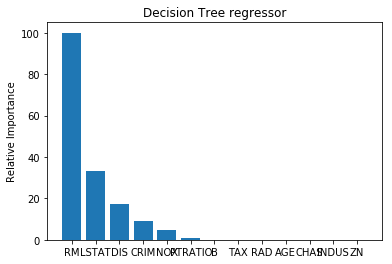

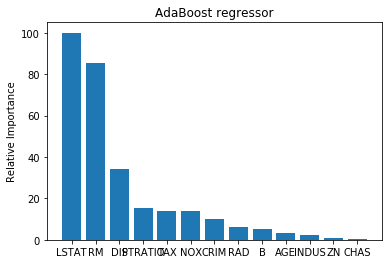

In [32]:
plot_feature_importances(dt_regressor.feature_importances_, 'Decision Tree regressor', housing_data.feature_names)
plot_feature_importances(ab_regressor.feature_importances_, 'AdaBoost regressor', housing_data.feature_names)

### 1.11 评估共享单车的需求分布

In [34]:
import csv
import numpy as np
from sklearn.ensemble import RandomForestRegressor 
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [35]:
def load_dataset(filename):
    file_reader = csv.reader(open(filename, 'rb'), delimiter=',')
    X, y = [], []
    for row in file_reader:
        X.append(row[2:13])
        y.append(row[-1])
    feature_names = np.array(X[0])
    return np.array(X[1:]).astype(np.float32), np.array(y[1:]).astype(np.float32), feature_names

In [36]:
fileName = 'C:\\Users\\Administrator\\Desktop\\ing\\Python-Machine-Learning-Cookbook-master\\Chapter01\\bike_day.csv'
X, y, feature_names = load_dataset(fileName)
X, y = shuffle(X, y, random_state=7)

num_training = int(0.9 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

In [38]:
rf_regressor = RandomForestRegressor(n_estimators=1000, max_depth=10)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred) 
print "\n#### Random Forest regressor performance ####"
print "Mean squared error =", round(mse, 2)
print "Explained variance score =", round(evs, 2)


#### Random Forest regressor performance ####
Mean squared error = 6.05
Explained variance score = 0.93


In [41]:
feature_names

array(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'], dtype='|S10')

## 第二章： 建立简单分类器

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.array([[3,1], [2,5], [1,8], [6,4], [5,2], [3,5], [4,7], [4,-1]])

In [3]:
y = [0, 1, 1, 0, 0, 1, 1, 0]

In [4]:
class_0 = np.array([X[i] for i in range(len(X)) if y[i]==0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i]==1])

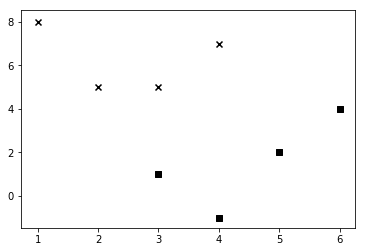

In [5]:
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], color='black', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], color='black', marker='x')

In [6]:
line_x = range(10)
line_y = line_x

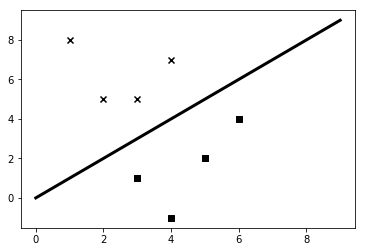

In [7]:
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], color='black', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], color='black', marker='x')
plt.plot(line_x, line_y, color='black', linewidth=3)
plt.show()

### 建立逻辑回归分类器

In [8]:
from sklearn import linear_model

In [9]:
X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2],
[1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [10]:
classifier = linear_model.LogisticRegression(solver='liblinear', C=10000)
#参数solver用于设置求解系统方程的算法类型，参数C表示正则化强度，数值越小，表示正则化强度越高

In [11]:
classifier.fit(X, y)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
def plot_classifier(classifier, X, y):
# 定义图形的取值范围
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0
    # 设置网格数据的步长
    step_size = 0.01
    # 定义网格
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size),
    np.arange(y_min, y_max, step_size))
    # 计算分类器输出结果
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    # 数组维度变形
    mesh_output = mesh_output.reshape(x_values.shape)
    # 用彩图画出分类结果
    plt.figure()
    # 选择配色方案
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1,cmap=plt.cm.Paired)
    # 设置图形的取值范围
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())
    # 设置X轴与Y轴
    plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))
    plt.show()

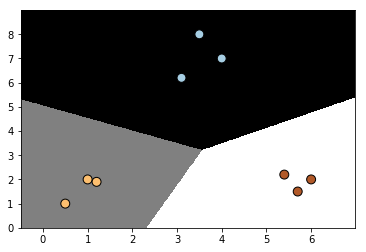

In [13]:
plot_classifier(classifier, X, y)

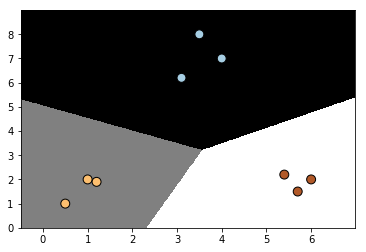

In [14]:
plot_classifier(classifier, X, y)

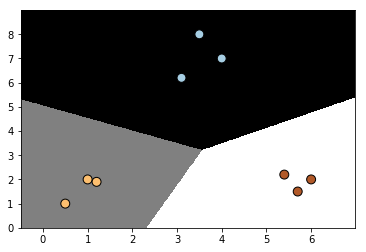

In [15]:
plot_classifier(classifier, X, y)

### 朴素贝叶斯分类器

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
input_file = 'C:\\Users\\Administrator\\Desktop\\ing\\Python-Machine-Learning-Cookbook-master\\Chapter02\\data_multivar.txt'
X = []
y = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = [float(x) for x in line.split(',')]
        X.append(data[:-1])
        y.append(data[-1])
X = np.array(X)
y = np.array(y)

In [18]:
#GaussianNB函数指定了正态分布朴素贝叶斯模型（Gaussian Naive Bayes model）
classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X, y)
y_pred = classifier_gaussiannb.predict(X)

In [19]:
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print ("Accuracy of the classifier =", round(accuracy, 2), "%")

Accuracy of the classifier = 99.5 %


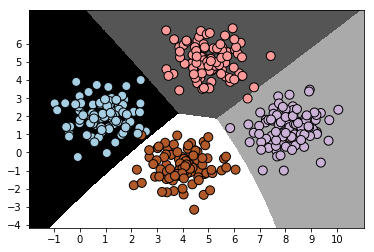

In [20]:
plot_classifier(classifier_gaussiannb, X, y)

### 将数据集分割成训练集和测试集

In [22]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y,
test_size=0.25, random_state=5)
classifier_gaussiannb_new = GaussianNB()
classifier_gaussiannb_new.fit(X_train, y_train)

GaussianNB(priors=None)

In [23]:
y_test_pred = classifier_gaussiannb_new.predict(X_test)

In [24]:
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print( "Accuracy of the classifier =", round(accuracy, 2), "%")

Accuracy of the classifier = 98.0 %


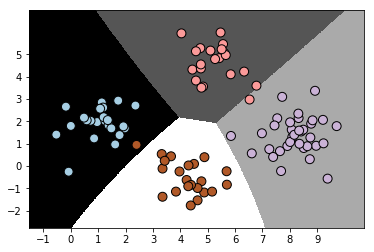

In [25]:
plot_classifier(classifier_gaussiannb_new, X_test, y_test)

### 混淆矩阵可视化

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]
confusion_mat = confusion_matrix(y_true, y_pred)

In [28]:
# 显示混淆矩阵
def plot_confusion_matrix(confusion_mat):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Paired)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(4)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

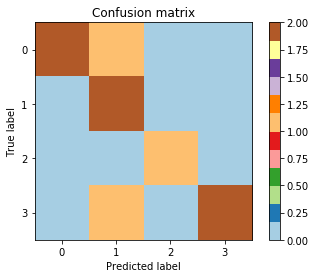

In [29]:
plot_confusion_matrix(confusion_mat)

In [30]:
from sklearn.metrics import classification_report
y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]
target_names = ['Class-0', 'Class-1', 'Class-2', 'Class-3']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Class-0       1.00      0.67      0.80         3
    Class-1       0.50      1.00      0.67         2
    Class-2       1.00      1.00      1.00         1
    Class-3       1.00      0.67      0.80         3

avg / total       0.89      0.78      0.79         9



## 第4章 无监督学习——聚类

### 4.2 用k-means算法聚类数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

In [14]:
filename = 'C:\\Users\\Administrator\\Desktop\\ing\\Python-Machine-Learning-Cookbook-master\\Chapter04\\data_multivar.txt'
data = []
with open(filename, 'r') as f:
    for line in f.readlines():
        temp = [float(i) for i in line.split(',')]
        data.append(temp)
data = np.array(data)
num_clusters = 4

([], <a list of 0 Text yticklabel objects>)

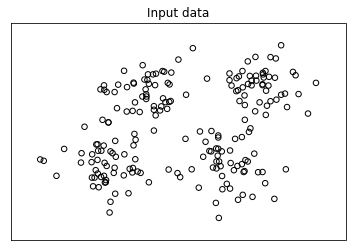

In [15]:
plt.figure()
plt.scatter(data[:,0], data[:,1], marker='o', 
        facecolors='none', edgecolors='k', s=30)
x_min, x_max = min(data[:, 0]) - 1, max(data[:, 0]) + 1
y_min, y_max = min(data[:, 1]) - 1, max(data[:, 1]) + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [17]:
kmeans = KMeans(init = 'k-means++',n_clusters = num_clusters,n_init = 10)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
step_size = 0.01

x_min, x_max = min(data[:, 0]) - 1, max(data[:, 0]) + 1
y_min, y_max = min(data[:, 1]) - 1, max(data[:, 1]) + 1
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

In [19]:
predicted_labels = kmeans.predict(np.c_[x_values.ravel(), y_values.ravel()])

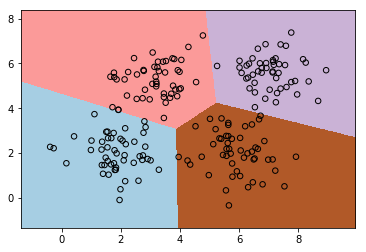

In [20]:
predicted_labels = predicted_labels.reshape(x_values.shape)
plt.figure()
plt.clf()
plt.imshow(predicted_labels, interpolation='nearest',
           extent=(x_values.min(), x_values.max(), y_values.min(), y_values.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.scatter(data[:,0], data[:,1], marker='o', 
        facecolors='none', edgecolors='k', s=30)

### 4.4 建立均值漂移聚类模型

In [39]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

In [40]:
filename = 'C:\\Users\\Administrator\\Desktop\\ing\\Python-Machine-Learning-Cookbook-master\\Chapter04\\data_multivar.txt'
data = []
with open(filename, 'r') as f:
    for line in f.readlines():
        temp = [float(i) for i in line.split(',')]
        data.append(temp)
X = np.array(data)

In [41]:
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

In [42]:
meanshift_estimator = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_estimator.fit(X)
labels = meanshift_estimator.labels_
centroids = meanshift_estimator.cluster_centers_
num_clusters = len(np.unique(labels))
print "Number of clusters in input data =", num_clusters

Number of clusters in input data = 4


In [43]:
import matplotlib.pyplot as plt
from itertools import cycle

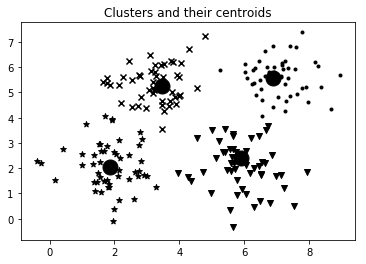

In [44]:
plt.figure()
markers = '.*xv'
for i, marker in zip(range(num_clusters), markers):
    # plot the points belong to the current cluster
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color='k')

    # plot the centroid of the current cluster
    centroid = centroids[i]
    plt.plot(centroid[0], centroid[1], marker='o', markerfacecolor='k',
             markeredgecolor='k', markersize=15)

plt.title('Clusters and their centroids')
plt.show()


### 4.5 用凝聚层次聚类进行数据分组

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [46]:
def perform_clustering(X, connectivity, title, num_clusters=3, linkage='ward'):
    plt.figure()
    model = AgglomerativeClustering(linkage=linkage, 
                    connectivity=connectivity, n_clusters=num_clusters)
    model.fit(X)

    # extract labels
    labels = model.labels_

    # specify marker shapes for different clusters
    markers = '.vx'

    for i, marker in zip(range(num_clusters), markers):
        # plot the points belong to the current cluster
        plt.scatter(X[labels==i, 0], X[labels==i, 1], s=50, 
                    marker=marker, color='k', facecolors='none')

In [47]:
def get_spiral(t, noise_amplitude=0.5):
    r = t
    x = r * np.cos(t)
    y = r * np.sin(t)

    return add_noise(x, y, noise_amplitude)

In [48]:
def add_noise(x, y, amplitude):
    X = np.concatenate((x, y))
    X += amplitude * np.random.randn(2, X.shape[1])
    return X.T

In [49]:
def get_rose(t, noise_amplitude=0.02):
    # Equation for "rose" (or rhodonea curve); if k is odd, then
    # the curve will have k petals, else it will have 2k petals
    k = 5       
    r = np.cos(k*t) + 0.25 
    x = r * np.cos(t)
    y = r * np.sin(t)

In [50]:
def get_hypotrochoid(t, noise_amplitude=0):
    a, b, h = 10.0, 2.0, 4.0
    x = (a - b) * np.cos(t) + h * np.cos((a - b) / b * t) 
    y = (a - b) * np.sin(t) - h * np.sin((a - b) / b * t) 

    return add_noise(x, y, 0)

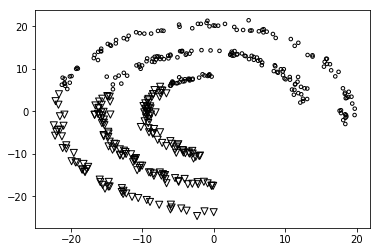

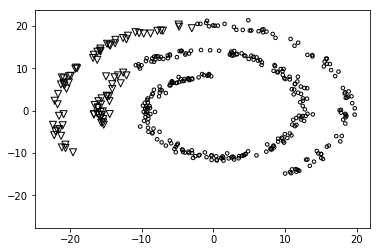

In [51]:
n_samples = 500 
np.random.seed(2)
t = 2.5 * np.pi * (1 + 2 * np.random.rand(1, n_samples))
X = get_spiral(t)

# No connectivity
connectivity = None 
perform_clustering(X, connectivity, 'No connectivity')

# Create K-Neighbors graph 
connectivity = kneighbors_graph(X, 10, include_self=False)
perform_clustering(X, connectivity, 'K-Neighbors connectivity')

plt.show()

### 4.6 评价聚类算法的聚类结果

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

In [53]:
filename = 'C:\\Users\\Administrator\\Desktop\\ing\\Python-Machine-Learning-Cookbook-master\\Chapter04\\data_perf.txt'
data = []
with open(filename, 'r') as f:
    for line in f.readlines():
        temp = [float(i) for i in line.split(',')]
        data.append(temp)
data = np.array(data)

In [55]:
scores = []
range_values = np.arange(2, 10)

for i in range_values:
    # Train the model
    kmeans = KMeans(init='k-means++', n_clusters=i, n_init=10)
    kmeans.fit(data)
    score = metrics.silhouette_score(data, kmeans.labels_, 
                metric='euclidean', sample_size=len(data))

    print "\nNumber of clusters =", i
    print "Silhouette score =", score
                    
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.5290397175472954

Number of clusters = 3
Silhouette score = 0.5551898802099927

Number of clusters = 4
Silhouette score = 0.5832757517829593

Number of clusters = 5
Silhouette score = 0.6582796909760834

Number of clusters = 6
Silhouette score = 0.600348303231998

Number of clusters = 7
Silhouette score = 0.5257914697918236

Number of clusters = 8
Silhouette score = 0.46298821976081045

Number of clusters = 9
Silhouette score = 0.4602848444467353


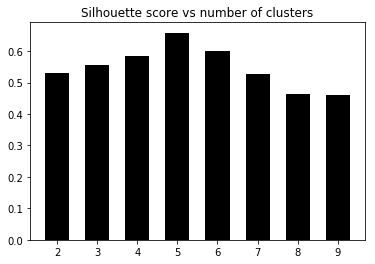

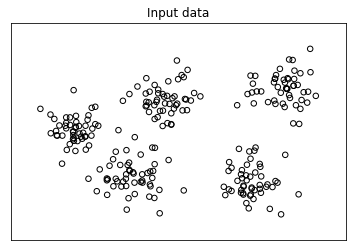

In [56]:
plt.figure()
plt.bar(range_values, scores, width=0.6, color='k', align='center')
plt.title('Silhouette score vs number of clusters')

# Plot data
plt.figure()
plt.scatter(data[:,0], data[:,1], color='k', s=30, marker='o', facecolors='none')
x_min, x_max = min(data[:, 0]) - 1, max(data[:, 0]) + 1
y_min, y_max = min(data[:, 1]) - 1, max(data[:, 1]) + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

### 4.7 用DBSCAN算法自动估算集群数量

In [57]:
from itertools import cycle

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt

In [59]:
filename = 'C:\\Users\\Administrator\\Desktop\\ing\\Python-Machine-Learning-Cookbook-master\\Chapter04\\data_perf.txt'
data = []
with open(filename, 'r') as f:
    for line in f.readlines():
        temp = [float(i) for i in line.split(',')]
        data.append(temp)
X = np.array(data)

In [60]:
eps_grid = np.linspace(0.3, 1.2, num=10)
silhouette_scores = []
eps_best = eps_grid[0]
silhouette_score_max = -1
model_best = None
labels_best = None
for eps in eps_grid:
    # Train DBSCAN clustering model
    model = DBSCAN(eps=eps, min_samples=5).fit(X)

    # Extract labels
    labels = model.labels_

    # Extract performance metric 
    silhouette_score = round(metrics.silhouette_score(X, labels), 4)
    silhouette_scores.append(silhouette_score)

    print "Epsilon:", eps, " --> silhouette score:", silhouette_score

    if silhouette_score > silhouette_score_max:
        silhouette_score_max = silhouette_score
        eps_best = eps
        model_best = model
        labels_best = labels

Epsilon: 0.3  --> silhouette score: 0.1287
Epsilon: 0.39999999999999997  --> silhouette score: 0.3594
Epsilon: 0.5  --> silhouette score: 0.5134
Epsilon: 0.6  --> silhouette score: 0.6165
Epsilon: 0.7  --> silhouette score: 0.6322
Epsilon: 0.7999999999999999  --> silhouette score: 0.6366
Epsilon: 0.8999999999999999  --> silhouette score: 0.5142
Epsilon: 1.0  --> silhouette score: 0.5629
Epsilon: 1.0999999999999999  --> silhouette score: 0.5629
Epsilon: 1.2  --> silhouette score: 0.5629



Best epsilon = 0.7999999999999999


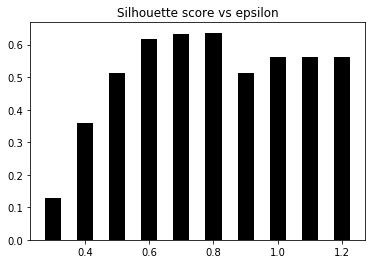

In [61]:
plt.figure()
plt.bar(eps_grid, silhouette_scores, width=0.05, color='k', align='center')
plt.title('Silhouette score vs epsilon')

# Best params
print "\nBest epsilon =", eps_best

In [62]:
model = model_best 
labels = labels_best

In [63]:
offset = 0
if -1 in labels:
    offset = 1
num_clusters = len(set(labels)) - offset 

print "\nEstimated number of clusters =", num_clusters

mask_core = np.zeros(labels.shape, dtype=np.bool)
mask_core[model.core_sample_indices_] = True


Estimated number of clusters = 5


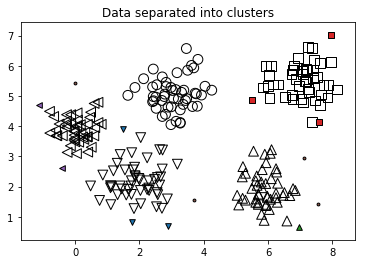

In [64]:
plt.figure()
labels_uniq = set(labels)
markers = cycle('vo^s<>')
for cur_label, marker in zip(labels_uniq, markers):
    if cur_label == -1:
        marker = '.'
    cur_mask = (labels == cur_label)

    cur_data = X[cur_mask & mask_core]
    plt.scatter(cur_data[:, 0], cur_data[:, 1], marker=marker,
             edgecolors='black', s=96, facecolors='none')

    cur_data = X[cur_mask & ~mask_core]
    plt.scatter(cur_data[:, 0], cur_data[:, 1], marker=marker,
             edgecolors='black', s=32)

plt.title('Data separated into clusters')
plt.show()

### 4.8 建立客户细分模型

In [5]:
import csv
import numpy as np
from sklearn import cluster, covariance, manifold
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

In [13]:
input_file = 'wholesale.csv'
file_reader = csv.reader(open(input_file, 'rb'), delimiter=',')
X = []
for count, row in enumerate(file_reader):
    if not count:
        names = row[2:]
        continue

    X.append([float(x) for x in row[2:]])
X = np.array(X)

In [16]:
bandwidth = estimate_bandwidth(X, quantile=0.8, n_samples=len(X))
meanshift_estimator = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_estimator.fit(X)
labels = meanshift_estimator.labels_
centroids = meanshift_estimator.cluster_centers_
num_clusters = len(np.unique(labels))

print "\nNumber of clusters in input data =", num_clusters


Number of clusters in input data = 8


In [17]:
print "\nCentroids of clusters:"
print '\t'.join([name[:3] for name in names])
for centroid in centroids:
    print '\t'.join([str(int(x)) for x in centroid])


Centroids of clusters:
Fre	Mil	Gro	Fro	Det	Del
9632	4671	6593	2570	2296	1248
40204	46314	57584	5518	25436	4241
8565	4980	67298	131	38102	1215
32717	16784	13626	60869	1272	5609
22925	73498	32114	987	20070	903
112151	29627	18148	16745	4948	8550
16117	46197	92780	1026	40827	2944
36847	43950	20170	36534	239	47943


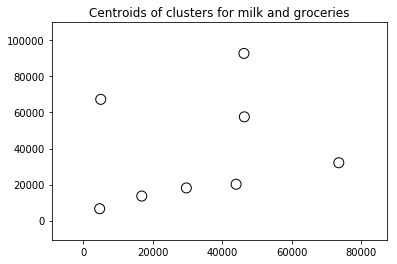

In [18]:
centroids_milk_groceries = centroids[:, 1:3]
plt.figure()
plt.scatter(centroids_milk_groceries[:,0], centroids_milk_groceries[:,1], 
        s=100, edgecolors='k', facecolors='none')
offset = 0.2
plt.xlim(centroids_milk_groceries[:,0].min() - offset * centroids_milk_groceries[:,0].ptp(),
        centroids_milk_groceries[:,0].max() + offset * centroids_milk_groceries[:,0].ptp(),)
plt.ylim(centroids_milk_groceries[:,1].min() - offset * centroids_milk_groceries[:,1].ptp(),
        centroids_milk_groceries[:,1].max() + offset * centroids_milk_groceries[:,1].ptp())
plt.title('Centroids of clusters for milk and groceries')
plt.show()

## 第6章 分析文本数据

### 6.2 用标记解析的方法预处理数据

In [1]:
text = "Are you curious about tokenization? Let's see how it works!\
We need to analyze a couple of sentences with punctuations to see it in action."


In [3]:
from nltk.tokenize import sent_tokenize

In [4]:
sent_tokenize_list = sent_tokenize(text)

In [6]:
print '\nSentence tokenizer:'
print sent_tokenize_list


Sentence tokenizer:
['Are you curious about tokenization?', "Let's see how it works!We need to analyze a couple of sentences with punctuations to see it in action."]


In [7]:
from nltk.tokenize import word_tokenize
print '\nWord tokenizer'
print word_tokenize(text)


Word tokenizer
['Are', 'you', 'curious', 'about', 'tokenization', '?', 'Let', "'s", 'see', 'how', 'it', 'works', '!', 'We', 'need', 'to', 'analyze', 'a', 'couple', 'of', 'sentences', 'with', 'punctuations', 'to', 'see', 'it', 'in', 'action', '.']


In [11]:
from nltk.tokenize import WordPunctTokenizer

word_punct_tokenizer = WordPunctTokenizer()
print "\nWord punct tokenizer:"
print word_punct_tokenizer.tokenize(text)


Word punct tokenizer:
['Are', 'you', 'curious', 'about', 'tokenization', '?', 'Let', "'", 's', 'see', 'how', 'it', 'works', '!', 'We', 'need', 'to', 'analyze', 'a', 'couple', 'of', 'sentences', 'with', 'punctuations', 'to', 'see', 'it', 'in', 'action', '.']


### 6.3 提取文本数据的词干

In [13]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

In [15]:
words = ['table', 'probably', 'wolves', 'playing', 'is', 
        'dog', 'the', 'beaches', 'grounded', 'dreamt', 'envision']

In [17]:
stemmers = ['PORTER', 'LANCASTER', 'SNOWBALL']
stemmer_porter = PorterStemmer()
stemmer_lancaster = LancasterStemmer()
stemmer_snowball = SnowballStemmer('english')

In [18]:
formatted_row = '{:>16}' * (len(stemmers) + 1)
print '\n', formatted_row.format('WORD', *stemmers), '\n'


            WORD          PORTER       LANCASTER        SNOWBALL 



In [19]:
for word in words:
    stemmed_words = [stemmer_porter.stem(word), 
            stemmer_lancaster.stem(word), stemmer_snowball.stem(word)]
    print formatted_row.format(word, *stemmed_words)

           table            tabl            tabl            tabl
        probably         probabl            prob         probabl
          wolves            wolv            wolv            wolv
         playing            play            play            play
              is              is              is              is
             dog             dog             dog             dog
             the             the             the             the
         beaches           beach           beach           beach
        grounded          ground          ground          ground
          dreamt          dreamt          dreamt          dreamt
        envision           envis           envid           envis


### 6.4 用词形还原的方法还原文本的基本形式

In [20]:
from nltk.stem import WordNetLemmatizer

In [21]:
words = ['table', 'probably', 'wolves', 'playing', 'is', 
        'dog', 'the', 'beaches', 'grounded', 'dreamt', 'envision']

In [22]:
lemmatizers = ['NOUN LEMMATIZER', 'VERB LEMMATIZER']
lemmatizer_wordnet = WordNetLemmatizer()

In [23]:
formatted_row = '{:>24}' * (len(lemmatizers) + 1)
print '\n', formatted_row.format('WORD', *lemmatizers), '\n'


                    WORD         NOUN LEMMATIZER         VERB LEMMATIZER 



In [24]:
for word in words:
    lemmatized_words = [lemmatizer_wordnet.lemmatize(word, pos='n'),
           lemmatizer_wordnet.lemmatize(word, pos='v')]
    print formatted_row.format(word, *lemmatized_words)

                   table                   table                   table
                probably                probably                probably
                  wolves                    wolf                  wolves
                 playing                 playing                    play
                      is                      is                      be
                     dog                     dog                     dog
                     the                     the                     the
                 beaches                   beach                   beach
                grounded                grounded                  ground
                  dreamt                  dreamt                   dream
                envision                envision                envision


### 6.5 用分块的方法划分文本

In [25]:
import numpy as np
from nltk.corpus import brown

In [31]:
def splitter(data, num_words):
    words = data.split(' ')
    output = []

    cur_count = 0
    cur_words = []
    for word in words:
        cur_words.append(word)
        cur_count += 1
        if cur_count == num_words:
            output.append(' '.join(cur_words))
            cur_words = []
            cur_count = 0

    output.append(' '.join(cur_words) )

    return output 

In [32]:
data = ' '.join(brown.words()[:10000])
num_words = 1700
chunks = []
counter = 0
text_chunks = splitter(data, num_words)
print "Number of text chunks =",len(text_chunks)

Number of text chunks = 6


### 6.6 创建词袋模型

In [1]:
import numpy as np
from nltk.corpus import brown

In [2]:
def splitter(data, num_words):
    words = data.split(' ')
    output = []

    cur_count = 0
    cur_words = []
    for word in words:
        cur_words.append(word)
        cur_count += 1
        if cur_count == num_words:
            output.append(' '.join(cur_words))
            cur_words = []
            cur_count = 0

    output.append(' '.join(cur_words) )

    return output 

In [3]:
data = ' '.join(brown.words()[:10000])
 
num_words = 2000

chunks = []
counter = 0

text_chunks = splitter(data, num_words)

for text in text_chunks:
    chunk = {'index': counter, 'text': text}
    chunks.append(chunk)
    counter += 1

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=5, max_df=.95)
doc_term_matrix = vectorizer.fit_transform([chunk['text'] for chunk in chunks])

vocab = np.array(vectorizer.get_feature_names())
print "\nVocabulary:"
print vocab

print "\nDocument term matrix:"
chunk_names = ['Chunk-0', 'Chunk-1', 'Chunk-2', 'Chunk-3', 'Chunk-4']
formatted_row = '{:>12}' * (len(chunk_names) + 1)
print '\n', formatted_row.format('Word', *chunk_names), '\n'
for word, item in zip(vocab, doc_term_matrix.T):
    output = [str(x) for x in item.data]
    print formatted_row.format(word, *output)


Vocabulary:
[u'about' u'after' u'against' u'aid' u'all' u'also' u'an' u'and' u'are'
 u'as' u'at' u'be' u'been' u'before' u'but' u'by' u'committee' u'congress'
 u'did' u'each' u'education' u'first' u'for' u'from' u'general' u'had'
 u'has' u'have' u'he' u'health' u'his' u'house' u'in' u'increase' u'is'
 u'it' u'last' u'made' u'make' u'may' u'more' u'no' u'not' u'of' u'on'
 u'one' u'only' u'or' u'other' u'out' u'over' u'pay' u'program'
 u'proposed' u'said' u'similar' u'state' u'such' u'take' u'than' u'that'
 u'the' u'them' u'there' u'they' u'this' u'time' u'to' u'two' u'under'
 u'up' u'was' u'were' u'what' u'which' u'who' u'will' u'with' u'would'
 u'year' u'years']

Document term matrix:

        Word     Chunk-0     Chunk-1     Chunk-2     Chunk-3     Chunk-4 

       about           1           1           1           1           3
       after           2           3           2           1           3
     against           1           2           2           1           1
         a

### 6.7 创建文本分类器

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
category_map = {'misc.forsale': 'Sales', 'rec.motorcycles': 'Motorcycles', 
        'rec.sport.baseball': 'Baseball', 'sci.crypt': 'Cryptography', 
        'sci.space': 'Space'}

In [4]:
training_data = fetch_20newsgroups(subset='train', 
        categories=category_map.keys(), shuffle=True, random_state=7)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_termcounts = vectorizer.fit_transform(training_data.data)
print "\nDimensions of training data:", X_train_termcounts.shape


Dimensions of training data: (2968, 40605)


In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

In [8]:
input_data = [
    "The curveballs of right handed pitchers tend to curve to the left", 
    "Caesar cipher is an ancient form of encryption",
    "This two-wheeler is really good on slippery roads"
]

In [9]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_termcounts)

In [10]:
classifier = MultinomialNB().fit(X_train_tfidf, training_data.target)
X_input_termcounts = vectorizer.transform(input_data)
X_input_tfidf = tfidf_transformer.transform(X_input_termcounts)

In [12]:
predicted_categories = classifier.predict(X_input_tfidf)
for sentence, category in zip(input_data, predicted_categories):
    print '\nInput:', sentence, '\nPredicted category:', \
            category_map[training_data.target_names[category]]


Input: The curveballs of right handed pitchers tend to curve to the left 
Predicted category: Baseball

Input: Caesar cipher is an ancient form of encryption 
Predicted category: Cryptography

Input: This two-wheeler is really good on slippery roads 
Predicted category: Motorcycles


### 6.8 识别性别

In [1]:
import random
from nltk.corpus import names
from nltk import NaiveBayesClassifier
from nltk.classify import accuracy as nltk_accuracy

In [2]:
def gender_features(word,num_letters = 2):
    return {'feature' : word[-num_letters:].lower()}

In [5]:
labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
        [(name, 'female') for name in names.words('female.txt')])

random.seed(7)
random.shuffle(labeled_names)
input_names = ['Leonardo', 'Amy', 'Sam']

In [6]:
for i in range(1, 5):
    print '\nNumber of letters:', i
    featuresets = [(gender_features(n, i), gender) for (n, gender) in labeled_names]
    train_set, test_set = featuresets[500:], featuresets[:500]
    classifier = NaiveBayesClassifier.train(train_set)

    print 'Accuracy ==>', str(100 * nltk_accuracy(classifier, test_set)) + str('%')

    for name in input_names:
        print name, '==>', classifier.classify(gender_features(name, i))


Number of letters: 1
Accuracy ==> 76.6%
Leonardo ==> male
Amy ==> female
Sam ==> male

Number of letters: 2
Accuracy ==> 80.2%
Leonardo ==> male
Amy ==> female
Sam ==> male

Number of letters: 3
Accuracy ==> 78.4%
Leonardo ==> male
Amy ==> female
Sam ==> female

Number of letters: 4
Accuracy ==> 71.6%
Leonardo ==> male
Amy ==> female
Sam ==> female


### 6.9 分析句子的情感

In [7]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews

In [8]:
def extract_features(word_list):
    return dict([(word, True) for word in word_list])

In [9]:
positive_fileids = movie_reviews.fileids('pos')
negative_fileids = movie_reviews.fileids('neg')

In [10]:
features_positive = [(extract_features(movie_reviews.words(fileids=[f])), 
        'Positive') for f in positive_fileids]
features_negative = [(extract_features(movie_reviews.words(fileids=[f])), 
        'Negative') for f in negative_fileids]

In [11]:
threshold_factor = 0.8
threshold_positive = int(threshold_factor * len(features_positive))
threshold_negative = int(threshold_factor * len(features_negative))

In [12]:
features_train = features_positive[:threshold_positive] + features_negative[:threshold_negative]
features_test = features_positive[threshold_positive:] + features_negative[threshold_negative:]  
print "\nNumber of training datapoints:", len(features_train)
print "Number of test datapoints:", len(features_test)


Number of training datapoints: 1600
Number of test datapoints: 400


In [13]:
classifier = NaiveBayesClassifier.train(features_train)
print "\nAccuracy of the classifier:", nltk.classify.util.accuracy(classifier, features_test)


Accuracy of the classifier: 0.735


In [14]:
print "\nTop 10 most informative words:"
for item in classifier.most_informative_features()[:10]:
    print item[0]


Top 10 most informative words:
outstanding
insulting
vulnerable
ludicrous
uninvolving
astounding
avoids
fascination
animators
darker


In [16]:
input_reviews = [
    "It is an amazing movie", 
    "This is a dull movie. I would never recommend it to anyone.",
    "The cinematography is pretty great in this movie", 
    "The direction was terrible and the story was all over the place" ]

In [17]:
print "\nPredictions:"
for review in input_reviews:
    print "\nReview:", review
    probdist = classifier.prob_classify(extract_features(review.split()))
    pred_sentiment = probdist.max()
    print "Predicted sentiment:", pred_sentiment 
    print "Probability:", round(probdist.prob(pred_sentiment), 2)


Predictions:

Review: It is an amazing movie
Predicted sentiment: Positive
Probability: 0.61

Review: This is a dull movie. I would never recommend it to anyone.
Predicted sentiment: Negative
Probability: 0.77

Review: The cinematography is pretty great in this movie
Predicted sentiment: Positive
Probability: 0.67

Review: The direction was terrible and the story was all over the place
Predicted sentiment: Negative
Probability: 0.63


## 第9章 图像内容分析

In [4]:
import sys 
import cv2
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
input_file = 'C:\\Users\\Administrator\\Desktop\\ing\\Python-Machine-Learning-Cookbook-master\\Chapter09\\forest.jpg'

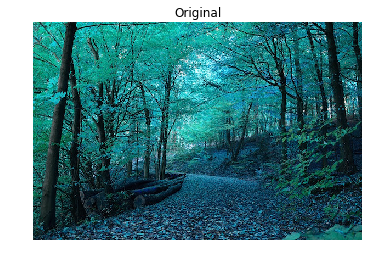

In [54]:
img = cv2.imread(input_file)
plt.imshow(img)
plt.axis('off')
plt.title('Original')
plt.show()

In [7]:
h,w = img.shape[:2]
start_row,end_row = int(0.21*h),int(0.73*h)
start_col,end_col = int(0.37*w),int(0.92*w)

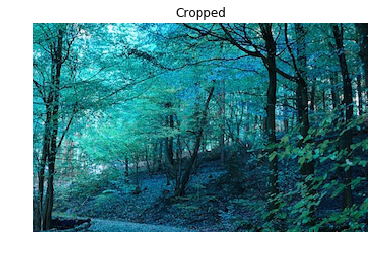

In [10]:
img_cropped = img[start_row:end_row,start_col:end_col]
plt.imshow(img_cropped)
plt.axis('off')
plt.title('Cropped')
plt.show()

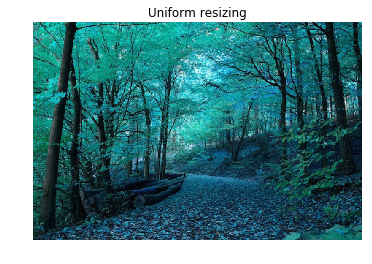

In [11]:
scaling_factor = 1.3
img_scaled = cv2.resize(img,None,fx = scaling_factor,fy = scaling_factor,interpolation=cv2.INTER_LINEAR)
plt.imshow(img_scaled)
plt.axis('off')
plt.title('Uniform resizing')
plt.show()

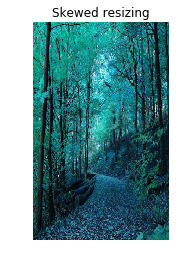

In [12]:
img_scaled = cv2.resize(img,(250,400),interpolation = cv2.INTER_AREA)
plt.imshow(img_scaled)
plt.axis('off')
plt.title('Skewed resizing')
plt.show()

In [17]:
#保存图像  换后缀，所以是-4
output_file = input_file[:-4] + '_corpped.jpg'
cv2.imwrite(output_file,img_cropped)

True

### 9.3 检测边

In [39]:
import sys 
import cv2
import numpy as np

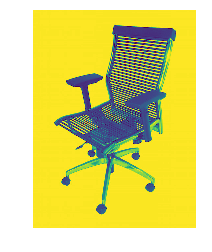

In [42]:
input_file = 'C:\\Users\\Administrator\\Desktop\\ing\\Python-Machine-Learning-Cookbook-master\\Chapter09\\chair.jpg'
img = cv2.imread(input_file,cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.axis('off')
plt.show()

In [43]:
h,w = img.shape

In [44]:
#索贝尔水平检测器
sobel_horizontal = cv2.Sobel(img,cv2.CV_64F,1,0,ksize = 5)

#索贝尔垂直检测器
sobel_vertical = cv2.Sobel(img,cv2.CV_64F,0,1,ksize = 5)

#拉普拉斯边检测器
laplacian = cv2.Laplacian(img,cv2.CV_64F)

#Canny边检测器
canny = cv2.Canny(img,50,240)

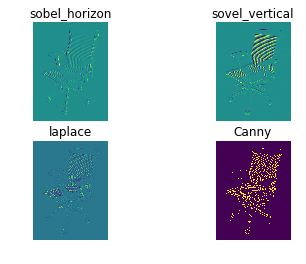

In [45]:
plt.subplot(2,2,1)
plt.imshow(sobel_horizontal)
plt.axis('off')
plt.title('sobel_horizon')

plt.subplot(2,2,2)
plt.imshow(sobel_vertical)
plt.axis('off')
plt.title('sovel_vertical')

plt.subplot(2,2,3)
plt.imshow(laplacian)
plt.axis('off')
plt.title('laplace')

plt.subplot(2,2,4)
plt.imshow(canny)
plt.axis('off')
plt.title('Canny')
plt.show()

### 9.4 直方图均衡化

In [2]:
import sys
import cv2
import numpy as np

In [59]:
input_file = 'C:\\Users\\Administrator\\Desktop\\ing\\Python-Machine-Learning-Cookbook-master\\Chapter09\\sunrise.jpg'
img = cv2.imread(input_file)

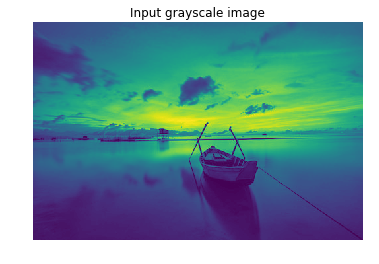

In [60]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)
plt.axis('off')
plt.title('Input grayscale image')
plt.show()

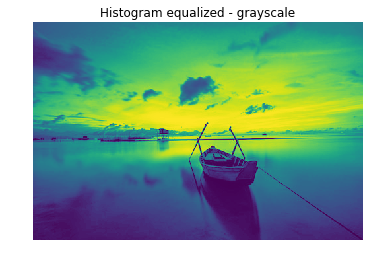

In [49]:
img_gray_histeq = cv2.equalizeHist(img_gray)
plt.imshow(img_gray_histeq)
plt.axis('off')
plt.title('Histogram equalized - grayscale')
plt.show()

### 9.5 检测棱角

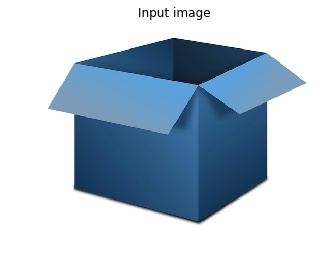

In [11]:
input_file = 'C:\\Users\\Administrator\\Desktop\\ing\\Python-Machine-Learning-Cookbook-master\\Chapter09\\box.png'
img = cv2.imread(input_file)
plt.imshow(img)
plt.axis('off')
plt.title('Input image')
plt.show()

In [12]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = np.float32(img_gray)
img_harris = cv2.cornerHarris(img_gray, 7, 5, 0.04)
img_harris = cv2.dilate(img_harris, None)
img[img_harris > 0.01 * img_harris.max()] = [0, 0, 0]

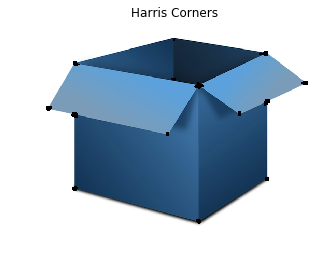

In [13]:
plt.imshow(img)
plt.axis('off')
plt.title('Harris Corners')
plt.show()

## 第11章 深度神经网络

In [2]:
import numpy as np
import neurolab as nl
import matplotlib.pyplot as plt

In [3]:
data = np.array([[0.3, 0.2], [0.1, 0.4], [0.4, 0.6], [0.9, 0.5]])
labels = np.array([[0], [0], [0], [1]])

Text(0.5,1,'Input data')

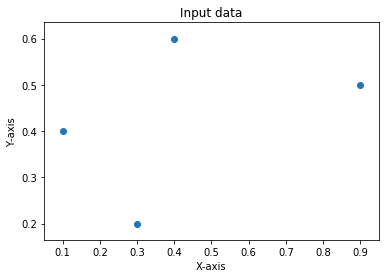

In [4]:
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Input data')

In [6]:
perceptron = nl.net.newp([[0, 1],[0, 1]], 1)
error = perceptron.train(data, labels, epochs=50, show=15, lr=0.01)

The goal of learning is reached


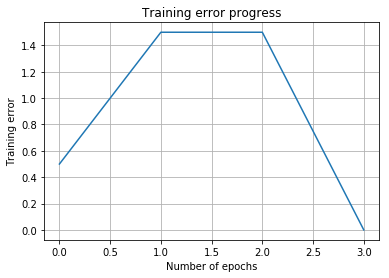

In [7]:
plt.figure()
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.grid()
plt.title('Training error progress')

plt.show()

### 11.3 创建一个单层神经网络

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [10]:
input_file = 'C:\\Users\\Administrator\\Desktop\\ing\\Python-Machine-Learning-Cookbook-master\\Chapter11\\data_single_layer.txt'
input_text = np.loadtxt(input_file)
data = input_text[:, 0:2]
labels = input_text[:, 2:]

Text(0.5,1,'Input data')

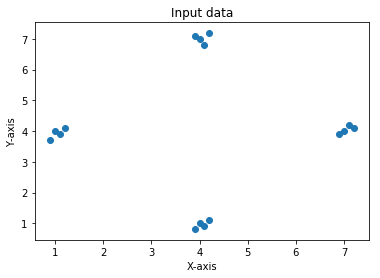

In [12]:
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Input data')

In [13]:
x_min, x_max = data[:,0].min(), data[:,0].max()
y_min, y_max = data[:,1].min(), data[:,1].max()

In [15]:
single_layer_net = nl.net.newp([[x_min, x_max], [y_min, y_max]], 2)
error = single_layer_net.train(data, labels, epochs=50, show=20, lr=0.01)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
The maximum number of train epochs is reached


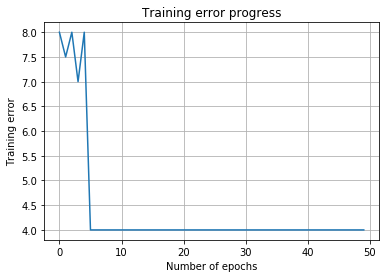

In [16]:
plt.figure()
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()

plt.show()

In [17]:
print single_layer_net.sim([[0.3, 4.5]])
print single_layer_net.sim([[4.5, 0.5]])
print single_layer_net.sim([[4.3, 8]])

[[0. 0.]]
[[1. 0.]]
[[1. 1.]]


### 11.4 创建一个深度神经网络

In [18]:
import neurolab as nl
import numpy as np
import matplotlib.pyplot as plt

In [19]:
min_value = -12
max_value = 12
num_datapoints = 90
x = np.linspace(min_value, max_value, num_datapoints)
y = 2 * np.square(x) + 7
y /= np.linalg.norm(y)

In [20]:
data = x.reshape(num_datapoints, 1)
labels = y.reshape(num_datapoints, 1)

Text(0.5,1,'Input data')

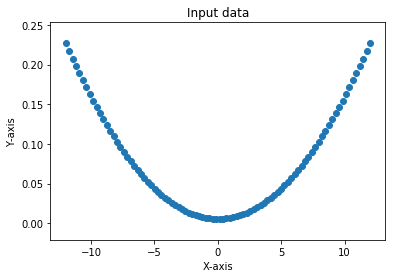

In [21]:
plt.figure()
plt.scatter(data, labels)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Input data')

In [23]:
multilayer_net = nl.net.newff([[min_value, max_value]], [10, 10, 1])
multilayer_net.trainf = nl.train.train_gd
error = multilayer_net.train(data, labels, epochs=800, show=100, goal=0.01)
predicted_output = multilayer_net.sim(data)

Epoch: 100; Error: 1.33830153143;
Epoch: 200; Error: 0.506772158884;
Epoch: 300; Error: 0.227856767944;
Epoch: 400; Error: 0.102545199776;
Epoch: 500; Error: 0.049177299623;
Epoch: 600; Error: 0.0273804182974;
Epoch: 700; Error: 0.0185453245587;
Epoch: 800; Error: 0.0151115728647;
The maximum number of train epochs is reached


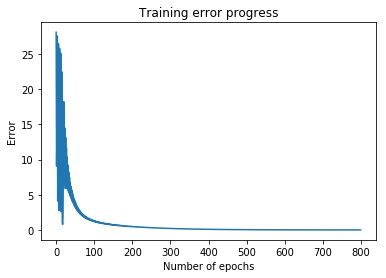

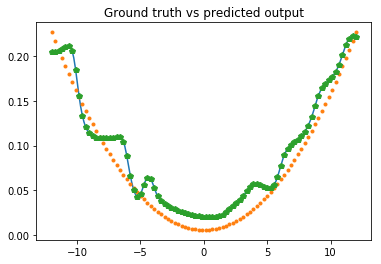

In [24]:
plt.figure()
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')

x2 = np.linspace(min_value, max_value, num_datapoints * 2)
y2 = multilayer_net.sim(x2.reshape(x2.size,1)).reshape(x2.size)
y3 = predicted_output.reshape(num_datapoints)

plt.figure()
plt.plot(x2, y2, '-', x, y, '.', x, y3, 'p')
plt.title('Ground truth vs predicted output')

plt.show()

### 11.6 为序列数据分析创建一个递归神经网络

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [30]:
def create_waveform(num_points):
    # Create train samples
    data1 = 1 * np.cos(np.arange(0, num_points))
    data2 = 2 * np.cos(np.arange(0, num_points))
    data3 = 3 * np.cos(np.arange(0, num_points))
    data4 = 4 * np.cos(np.arange(0, num_points))

    # Create varying amplitudes
    amp1 = np.ones(num_points)
    amp2 = 4 + np.zeros(num_points) 
    amp3 = 2 * np.ones(num_points) 
    amp4 = 0.5 + np.zeros(num_points) 

    data = np.array([data1, data2, data3, data4]).reshape(num_points * 4, 1)
    amplitude = np.array([[amp1, amp2, amp3, amp4]]).reshape(num_points * 4, 1)

    return data, amplitude

In [31]:
def draw_output(net, num_points_test):
    data_test, amplitude_test = create_waveform(num_points_test)
    output_test = net.sim(data_test)
    plt.plot(amplitude_test.reshape(num_points_test * 4))
    plt.plot(output_test.reshape(num_points_test * 4))

In [32]:
num_points = 30
data, amplitude = create_waveform(num_points)

# Create network with 2 layers
net = nl.net.newelm([[-2, 2]], [10, 1], [nl.trans.TanSig(), nl.trans.PureLin()])

# Set initialized functions and init
net.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
net.layers[1].initf= nl.init.InitRand([-0.1, 0.1], 'wb')
net.init()

# Training the recurrent neural network
error = net.train(data, amplitude, epochs=1000, show=100, goal=0.01)

# Compute output from network
output = net.sim(data)

Epoch: 100; Error: 1.65315966936;
Epoch: 200; Error: 1.09287211929;
Epoch: 300; Error: 0.120772917211;
Epoch: 400; Error: 0.10285262492;
Epoch: 500; Error: 0.0519973964836;
Epoch: 600; Error: 0.0368988743195;
Epoch: 700; Error: 0.0235389602405;
Epoch: 800; Error: 0.0188248320154;
Epoch: 900; Error: 0.0197009409585;
Epoch: 1000; Error: 0.0181057783309;
The maximum number of train epochs is reached


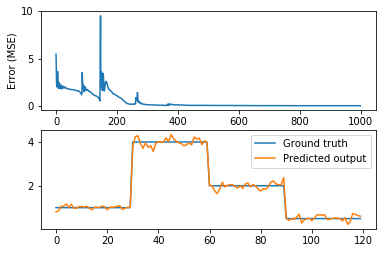

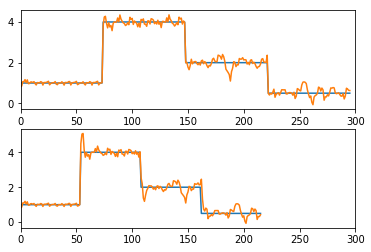

In [33]:
plt.subplot(211)
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Error (MSE)')

plt.subplot(212)
plt.plot(amplitude.reshape(num_points * 4))
plt.plot(output.reshape(num_points * 4))
plt.legend(['Ground truth', 'Predicted output'])

# Testing on unknown data at multiple scales
plt.figure()

plt.subplot(211)
draw_output(net, 74)
plt.xlim([0, 300])

plt.subplot(212)
draw_output(net, 54)
plt.xlim([0, 300])

plt.show()

### 11.7 在光学字符识别数据库中将字符可视化

In [1]:
import os
import sys

import cv2
import numpy as np

In [2]:
input_file = 'C:\\Users\\Administrator\\Desktop\\ing\\Python-Machine-Learning-Cookbook-master\\Chapter11\\letter.data' 
scaling_factor = 10
start_index = 6
end_index = -1
h, w = 16, 8

In [3]:
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = np.array([255*float(x) for x in line.split('\t')[start_index:end_index]])
        img = np.reshape(data, (h,w))
        img_scaled = cv2.resize(img, None, fx=scaling_factor, fy=scaling_factor)
        cv2.imshow('Image', img_scaled)
        c = cv2.waitKey()
        if c == 27:
            break